In [2]:
import pandas as pd
#Load in the cereal data
df = pd.read_csv("cereal.csv")
print(df.head(10))
# Data dimensionality (rows, colums)
print(df.shape)
# Data distributing
df.info()

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   
5    Apple Cinnamon Cheerios   G    C       110        2    2     180    1.5   
6                Apple Jacks   K    C       110        2    0     125    1.0   
7                    Basic 4   G    C       130        3    2     210    2.0   
8                  Bran Chex   R    C        90        2    1     200    4.0   
9                Bran Flakes   P    C        90        3    0     210    5.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3    1.00 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# Now seperate the dataset as response variable and feature variabes
X = df.drop(['rating','name','mfr','type'], axis=1)
y = df['rating']
# Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,train_size=0.8, random_state=50)
# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(df.describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002417959E9C8>,
      dtype=object)

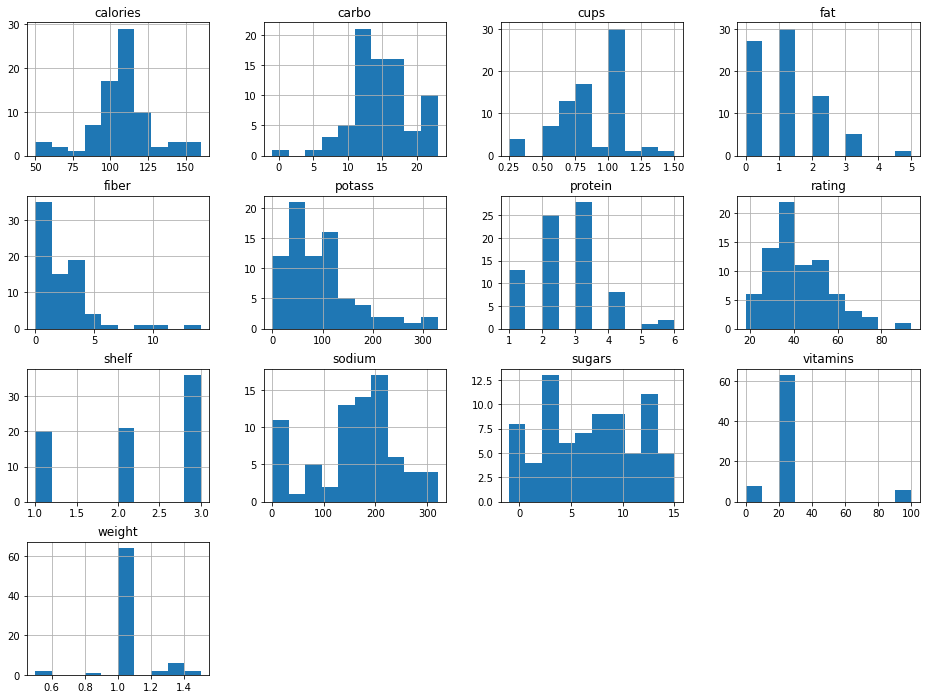

In [4]:
import matplotlib.pyplot as plt
# Histograms
df.hist(bins=10,figsize=(16, 12))


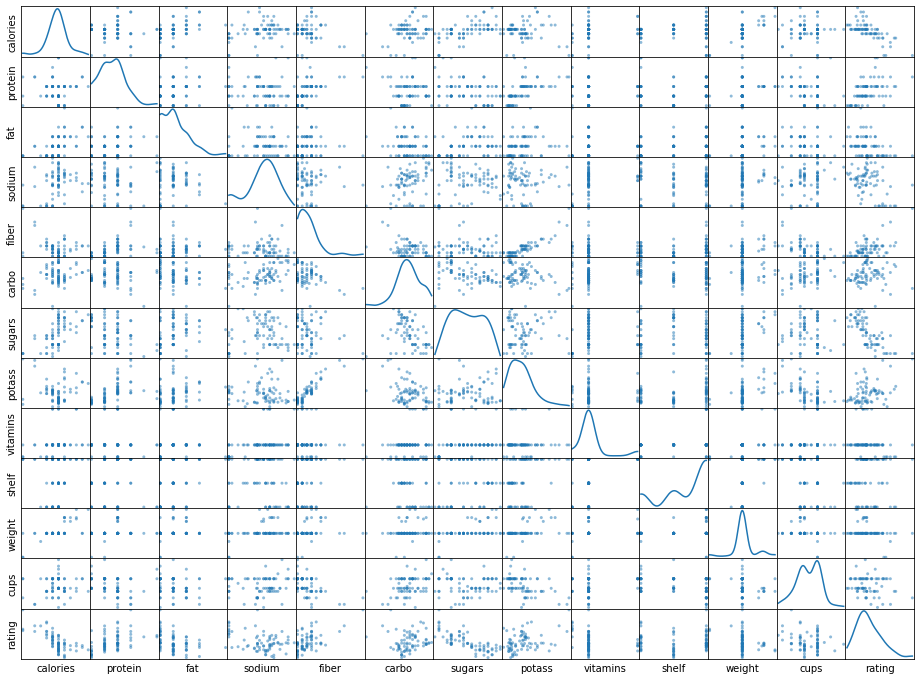

In [5]:
import plotly.express as px
# Scatterplot Matrix
sm = pd.plotting.scatter_matrix(df, figsize=(16, 12), diagonal='kde')
#Change label rotation
#[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
#[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
#[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

In [6]:
# Dividing wine as good and bad by giving the limit for the quality
bins = (18.0, 43.0, 100.0)
group_names = ['unhealthy','healthy']
df['rating'] = pd.cut(df['rating'], bins = bins, labels = group_names)
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,healthy
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,unhealthy
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,healthy
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,healthy
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,unhealthy
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,unhealthy
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,unhealthy
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,unhealthy
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,healthy
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,healthy


In [7]:
from sklearn.preprocessing import LabelEncoder
# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
# Bad becomes 0 and good becomes 1 and excellent becomes 2
df['rating'] = label_quality.fit_transform(df['rating'])
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,1
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,1
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,1
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,1
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,1
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,0
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,0


1    47
0    30
Name: rating, dtype: int64


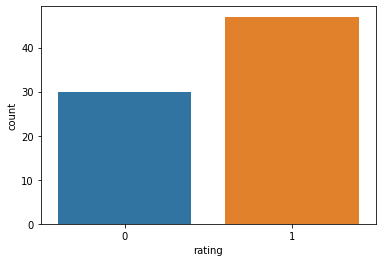

In [8]:
import seaborn as sns
print(df['rating'].value_counts())
sns.countplot(df['rating'])
plt.show()

In [9]:
X = df.drop(['rating','name','mfr','type'], axis=1)
y = df['rating']
# Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,train_size=0.8, random_state=50)
# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

SupportVectorClassifier: 0.883333 (0.106719)
RandomForestClassifier: 0.950000 (0.076376)
DecisionTreeClassifier: 0.852381 (0.116545)
GaussianNB: 0.871429 (0.139321)
KNeighborsClassifier: 0.869048 (0.124289)


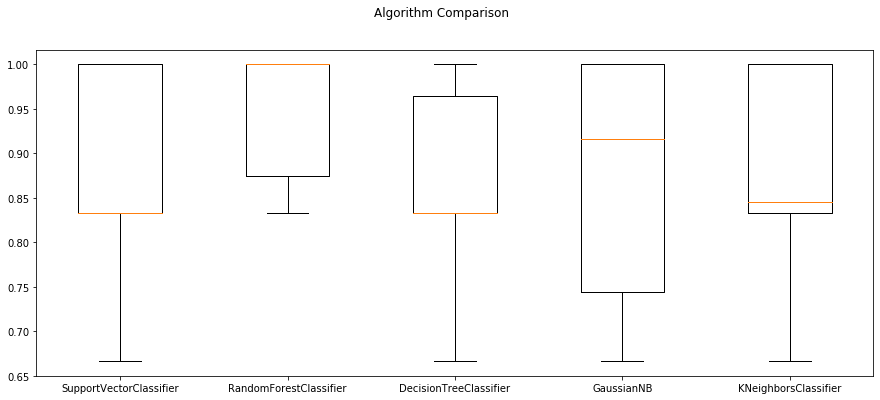

In [10]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('SupportVectorClassifier', SVC()))
#models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
#models.append(('AdaBoostClassifier', AdaBoostClassifier()))
#models.append(('LogisticRegression', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
   cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) 
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# Now seperate the dataset as response variable and feature variabes
X = df.drop(['rating','name','mfr','protein','carbo','sodium','shelf','weight','cups','type'], axis=1)
y = df['rating']
# Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,train_size=0.8, random_state=50)
# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(df.describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  